<a href="https://colab.research.google.com/github/savis11235/basic-python/blob/main/DiabetesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
data = pd.read_csv('/content/diabetes.csv')

In [32]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [38]:
data.size

6912

In [39]:
data.shape

(768, 9)

In [40]:
data.max()

,0
Pregnancies,17.00
Glucose,199.00
BloodPressure,122.00
SkinThickness,99.00
Insulin,846.00
BMI,67.10
DiabetesPedigreeFunction,2.42
Age,81.00
Outcome,1.00


In [41]:
data.min()

,0
Pregnancies,0.000
Glucose,0.000
BloodPressure,0.000
SkinThickness,0.000
Insulin,0.000
BMI,0.000
DiabetesPedigreeFunction,0.078
Age,21.000
Outcome,0.000


In [42]:
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [43]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [50]:
mean = np.mean(data)
median = np.median(data)
mode = data.mode()

range = data.max() - data.min()
variance = data.var()

print(f"Mean: \n{mean} \n")
print(f"Median \n{median} \n")
print(f"Mode: \n{mode} \n")
print(f"Range: \n{range} \n")
print(f"Variance: \n{variance}")

Mean: 
40.02614308449074 

Median 
24.3 

Mode: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0       99           70.0            0.0      0.0  32.0   
1          NaN      100            NaN            NaN      NaN   NaN   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.254  22.0      0.0  
1                     0.258   NaN      NaN   

Range: 
Pregnancies                  17.000
Glucose                     199.000
BloodPressure               122.000
SkinThickness                99.000
Insulin                     846.000
BMI                          67.100
DiabetesPedigreeFunction      2.342
Age                          60.000
Outcome                       1.000
dtype: float64 

Variance: 
Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            6

In [51]:
corr = data.corr()

<Axes: >

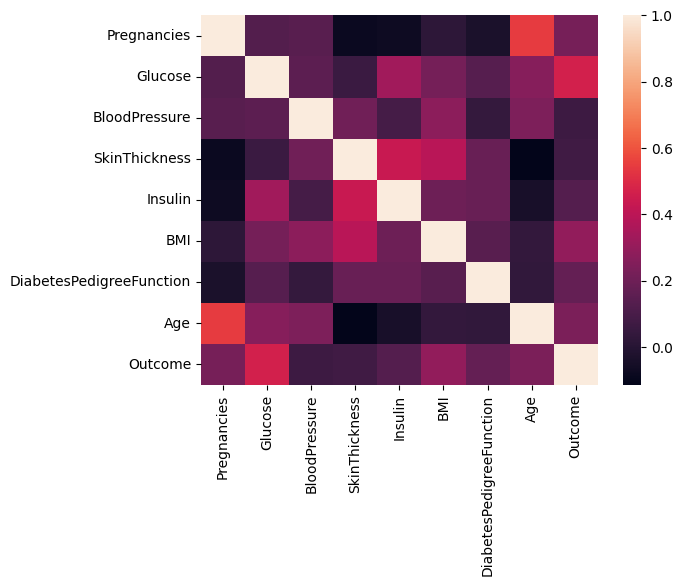

In [52]:
sns.heatmap(corr)

<Axes: xlabel='Insulin', ylabel='BMI'>

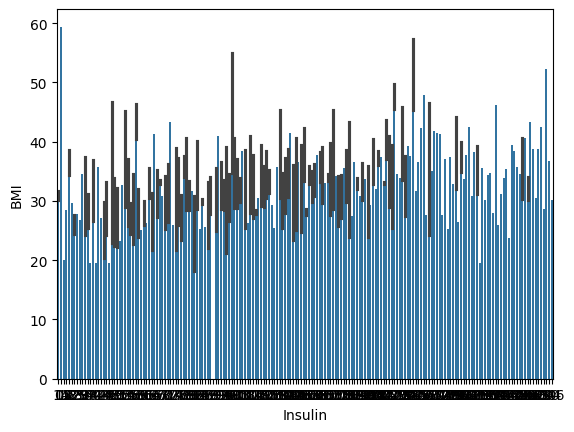

In [69]:
sns.barplot(data, x="Insulin", y="BMI")

<Axes: xlabel='Insulin', ylabel='SkinThickness'>

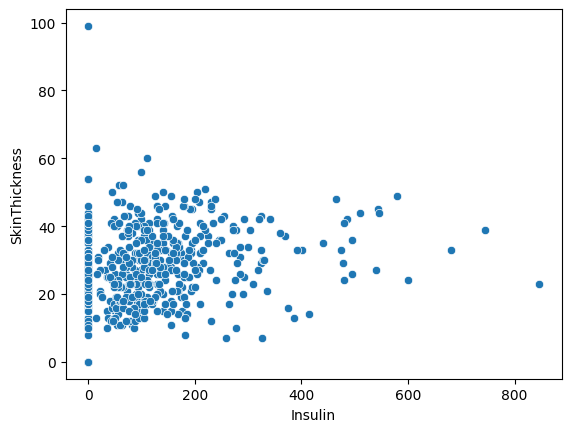

In [73]:
sns.scatterplot(data, x="Insulin", y="SkinThickness")

<Axes: xlabel='Insulin'>

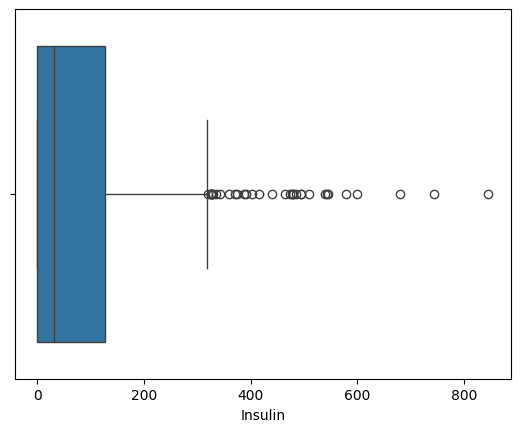

In [70]:
sns.boxplot(data, x="Insulin")

<Axes: xlabel='Insulin', ylabel='Glucose'>

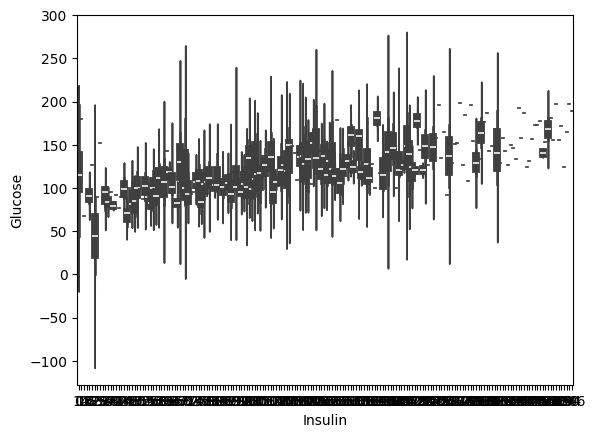

In [71]:
sns.violinplot(data, x="Insulin", y="Glucose")

In [65]:
x = data.drop("Insulin", axis=1)
y = data["Insulin"]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [68]:
print(x.size, x_train.size, x_test.size)

6144 4912 1232


In [76]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [77]:
pred = model.predict(x_train)

In [78]:
# Mean Squared Error
score_2 = metrics.mean_absolute_error(y_train, pred)

# R Squared Error
score_1 = metrics.r2_score(y_train, pred)

print(score_2, score_1)

63.04858266211643 0.3146911035759893


In [79]:
pred2 = model.predict(x_test)

In [80]:
# Mean Squared Error
score_4 = metrics.mean_absolute_error(y_test, pred2)

# R Squared Error
score_3 = metrics.r2_score(y_test, pred2)

print(score_4, score_3)

64.92863250000853 0.2181584648535273
